In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import os 

In [4]:
import warnings
warnings.filterwarnings('ignore')
#useful to set equal to 'once'

In [5]:
temps = pd.read_csv("temperature.csv", parse_dates = ['datetime'], index_col = 'datetime')
temps.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


## 1.	What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

Continous and interval: it's values can be broken down into different parts, units, fractions and decimals.

## 2.	What does ARIMA stand for? Break down and explain each piece in the name.

ARIMA stands for: Autoregressive integrated moving average.
- AR: AutoRegressive -  model uses the dependent relationship between current data and its past value.  (it's a linear regressive model that uses its own lags(fixed amount of time passing) as predictors. Linear regression models work best when the predictors are not correlated and are independent of each other.)

- I: integrated - the data is stationary. To make the series stationary, you difference it; subtract the previous vale from the current value

- MA : Moving Average - refers to the number of lagged forecast errors that should go into the ARIMA Model

## 3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.

In [6]:
# Converting Kelvin to Farenheit

def convert_k(K):
    f = (K - 273.15)*1.8 + 32
    return f

#temps = int(input("Enter number:"))
#print(convert_k(temps))

new_temps = temps.apply(convert_k)
new_temps

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,52.628000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,52.623150,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,52.609852,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,52.596554,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,47.930000,NaN,45.806000,68.720000,66.200000,61.502000,70.808000,54.626000,61.538000,...,62.762000,NaN,35.564000,58.874000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,49.532000,NaN,47.300000,72.554000,67.262000,63.428000,72.392000,55.940000,63.590000,...,60.962000,NaN,33.764000,55.166000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,50.432000,NaN,49.280000,73.058000,66.974000,64.742000,73.580000,55.922000,61.808000,...,56.534000,NaN,32.594000,51.422000,NaN,NaN,NaN,NaN,NaN,NaN


## 4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.

In [7]:
# creating a function to fill in non-trailing Nans in a df

def fill_missing(df):
    # interpolate fills NaN values. Linear method ignores the index and treats values as equally spaced
    # limit area: inside - only fills NaNs surrounded by valid values
    df = new_temps.interpolate(method ='linear', axis=0, limit_area='inside')
    #print(df.tail())
    return df

fill_missing(new_temps)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,52.628000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,52.623150,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,52.609852,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,52.596554,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,47.930000,NaN,45.806000,68.720000,66.200000,61.502000,70.808000,54.626000,61.538000,...,62.762000,NaN,35.564000,58.874000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,49.532000,NaN,47.300000,72.554000,67.262000,63.428000,72.392000,55.940000,63.590000,...,60.962000,NaN,33.764000,55.166000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,50.432000,NaN,49.280000,73.058000,66.974000,64.742000,73.580000,55.922000,61.808000,...,56.534000,NaN,32.594000,51.422000,NaN,NaN,NaN,NaN,NaN,NaN


## 5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.

Atlanta is warmer and colder than Los Angeles in the summer and winter. Philadelphia is also hotter and colder than Seattle on average.

In [8]:
#Summer Months
df_summer = new_temps[new_temps.index.month.isin([6,7,8])]
df_summer 

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,57.722,60.152,70.448,58.874,77.648,71.366,97.8080,97.628,84.560,67.010,...,85.694,85.370,81.158,82.256,66.1100,70.178,71.6000,71.8700,57.9920,63.104
2013-06-01 01:00:00,56.444,58.604,69.278,57.902,76.172,69.890,96.5840,96.962,83.246,65.876,...,82.148,82.256,77.684,77.720,66.1100,69.314,71.6000,71.8700,57.0020,63.104
2013-06-01 02:00:00,55.562,58.154,67.190,57.200,73.544,67.064,86.5805,94.910,81.536,62.762,...,79.556,79.250,74.912,74.714,66.1100,69.998,69.8000,71.8700,57.9920,61.898
2013-06-01 03:00:00,55.094,57.434,64.310,56.174,70.394,64.256,93.9020,92.570,79.250,59.000,...,77.000,77.594,73.184,71.942,74.2100,69.458,79.8800,73.3100,62.9960,61.952
2013-06-01 04:00:00,53.600,55.652,61.826,54.770,67.784,61.790,91.2740,89.708,75.326,56.354,...,75.110,76.550,72.680,70.592,74.2100,70.646,85.0280,73.3100,64.0040,62.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 19:00:00,67.334,73.616,73.238,64.598,93.128,83.030,95.3240,100.724,81.050,80.582,...,81.662,77.684,63.140,75.506,71.5784,81.608,91.4000,82.4000,82.4000,81.698
2017-08-31 20:00:00,68.774,76.262,77.702,66.560,95.936,87.260,98.2220,101.822,83.750,82.184,...,80.600,74.894,61.304,74.606,63.4064,80.798,87.8000,82.4000,82.4000,81.014
2017-08-31 21:00:00,70.538,78.512,83.732,69.278,98.330,88.232,98.5820,104.486,84.650,82.382,...,76.856,76.406,60.764,74.066,63.4064,80.600,86.0000,80.7764,80.7764,80.600


In [9]:
#get the summer avg temperature

summer_avg = df_summer.mean(axis=0).sort_values().round(2)
summer_avg
#df_summer.describe() --> used this to check if my averages were correct

Vancouver            64.62
Seattle              64.75
San Francisco        65.73
Portland             67.12
Montreal             67.54
Toronto              68.18
Denver               69.32
Minneapolis          69.94
San Diego            69.97
Boston               70.07
Pittsburgh           70.39
Detroit              70.70
Chicago              70.81
Los Angeles          72.45
Albuquerque          72.70
Indianapolis         73.10
Philadelphia         73.49
New York             73.66
Kansas City          76.45
Beersheba            76.48
Saint Louis          76.49
Charlotte            76.81
Nashville            77.18
Atlanta              77.39
Jerusalem            79.34
Nahariyya            79.54
Jacksonville         81.20
Tel Aviv District    81.41
Haifa                82.33
Miami                82.67
San Antonio          82.94
Houston              82.97
Dallas               83.79
Eilat                88.68
Las Vegas            88.73
Phoenix              91.31
dtype: float64

In [10]:
# Winter Months
df_winter = new_temps[new_temps.index.month.isin([12,1,2])]
df_winter

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-12-01 00:00:00,50.000,46.598,60.548,51.188,61.682,64.472,66.776,72.176,51.116,55.130,...,34.124,38.102,22.568,37.580,57.9920,57.200,58.8200,67.6760,67.6760,60.854
2012-12-01 01:00:00,49.550,45.410,60.836,50.180,61.466,63.302,65.138,69.494,45.986,51.440,...,32.378,37.994,20.732,37.670,57.9920,55.400,53.6000,67.6760,67.6760,60.854
2012-12-01 02:00:00,49.730,45.014,60.530,49.964,61.466,62.546,64.652,65.120,42.710,49.028,...,30.884,37.166,19.598,37.292,57.0020,55.400,56.1830,67.6760,67.6760,60.854
2012-12-01 03:00:00,49.262,44.492,59.846,49.190,61.394,61.376,63.914,63.590,46.382,44.744,...,30.200,36.608,16.502,37.760,57.0020,57.272,58.7660,67.6760,67.6760,60.854
2012-12-01 04:00:00,49.154,44.888,60.386,48.614,61.538,60.458,62.672,59.936,42.206,40.568,...,30.110,35.996,13.496,37.526,55.9940,57.848,58.1630,67.6760,67.6760,60.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35.582,43.088,53.456,39.002,58.748,57.380,52.862,59.018,55.778,35.906,...,63.248,59.270,42.080,53.060,56.7644,68.792,76.1180,64.4000,64.4000,68.684
2017-02-28 20:00:00,37.094,44.546,54.122,41.468,58.730,57.398,55.022,59.342,54.320,35.582,...,63.644,59.324,42.656,53.204,53.5712,69.800,75.2360,64.4000,64.4000,69.800
2017-02-28 21:00:00,39.452,45.626,56.642,43.808,61.358,59.828,55.994,62.600,52.898,33.800,...,63.698,57.632,42.026,52.232,53.5712,68.792,69.8000,66.6662,66.6662,70.736


In [11]:
winter_avg = df_winter.mean(axis=0).sort_values().round(2)
winter_avg

Minneapolis          18.34
Montreal             20.41
Toronto              27.04
Detroit              27.63
Chicago              28.11
Denver               31.07
Indianapolis         31.16
Pittsburgh           31.81
Boston               32.44
Kansas City          33.85
New York             34.06
Philadelphia         34.54
Saint Louis          34.69
Albuquerque          35.84
Vancouver            38.75
Portland             40.12
Seattle              40.74
Nashville            41.69
Charlotte            43.95
Atlanta              46.07
Las Vegas            46.54
Dallas               48.92
Beersheba            51.21
San Francisco        51.24
Phoenix              53.56
San Antonio          54.25
San Diego            54.68
Los Angeles          54.79
Jerusalem            54.85
Houston              56.02
Tel Aviv District    57.36
Eilat                57.48
Nahariyya            58.00
Jacksonville         58.59
Haifa                60.01
Miami                70.94
dtype: float64

In [12]:
#new df with summer and winter averages
Summer_Winter_Avg = {"Summer Average Temps": summer_avg, "Winter Average Temps": winter_avg}
Temperature_Avg_df = pd.DataFrame(Summer_Winter_Avg)
Temperature_Avg_df 

,Summer Average Temps,Winter Average Temps
Albuquerque,72.70,35.84
Atlanta,77.39,46.07
Beersheba,76.48,51.21
Boston,70.07,32.44
Charlotte,76.81,43.95
Chicago,70.81,28.11
Dallas,83.79,48.92
Denver,69.32,31.07
Detroit,70.70,27.63
Eilat,88.68,57.48


In [13]:
Temperature_Avg_df.reset_index()
Avg_temp = Temperature_Avg_df.rename_axis('Cities').reset_index()
Avg_temp 

,Cities,Summer Average Temps,Winter Average Temps
0,Albuquerque,72.70,35.84
1,Atlanta,77.39,46.07
2,Beersheba,76.48,51.21
3,Boston,70.07,32.44
4,Charlotte,76.81,43.95
5,Chicago,70.81,28.11
6,Dallas,83.79,48.92
7,Denver,69.32,31.07
8,Detroit,70.70,27.63
9,Eilat,88.68,57.48


In [14]:
Avg_temp.columns 

Index(['Cities', 'Summer Average Temps', 'Winter Average Temps'], dtype='object')

In [27]:
#creating empty list CityA and CityB for values to go into
CityA=[]
CityB=[]
#nested loop to compare the cities. This is the outer loop that compares each city
for a in range(len(Avg_temp['Cities'])):
    city =Avg_temp.iloc[a,0]
    summer = Avg_temp.iloc[a,1]
    winter = Avg_temp.iloc[a,2]
    #inner loop to find cities A that are both warmer and colder than cities B
    for b in range(len(Avg_temp['Cities'])):
        if city != Avg_temp.iloc[b,0]:
            if (summer>Avg_temp.iloc[b,1]) & (winter<Avg_temp.iloc[b,2]):
                CityA.append(city)
                CityB.append(Avg_temp.iloc[b,0])
                print(city, summer, " is hotter than ",Avg_temp.iloc[b,0],Avg_temp.iloc[b,1])
                print(city, winter, " is colder than ",Avg_temp.iloc[b,0],Avg_temp.iloc[b,2])

Albuquerque 72.7  is hotter than  Los Angeles 72.45
Albuquerque 35.84  is colder than  Los Angeles 54.79
Albuquerque 72.7  is hotter than  Portland 67.12
Albuquerque 35.84  is colder than  Portland 40.12
Albuquerque 72.7  is hotter than  San Diego 69.97
Albuquerque 35.84  is colder than  San Diego 54.68
Albuquerque 72.7  is hotter than  San Francisco 65.73
Albuquerque 35.84  is colder than  San Francisco 51.24
Albuquerque 72.7  is hotter than  Seattle 64.75
Albuquerque 35.84  is colder than  Seattle 40.74
Albuquerque 72.7  is hotter than  Vancouver 64.62
Albuquerque 35.84  is colder than  Vancouver 38.75
Atlanta 77.39  is hotter than  Beersheba 76.48
Atlanta 46.07  is colder than  Beersheba 51.21
Atlanta 77.39  is hotter than  Los Angeles 72.45
Atlanta 46.07  is colder than  Los Angeles 54.79
Atlanta 77.39  is hotter than  San Diego 69.97
Atlanta 46.07  is colder than  San Diego 54.68
Atlanta 77.39  is hotter than  San Francisco 65.73
Atlanta 46.07  is colder than  San Francisco 51.24


## 6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

Rolling average - includes all averages of the data until a specific point
Moving average - you get the average on the specific time period that it set

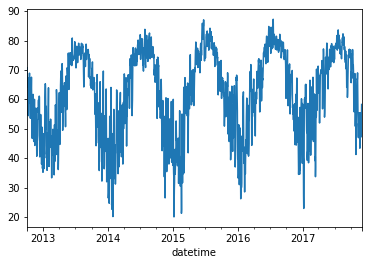

In [16]:
#Syntax : DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)

# Aggregate data to daily
day_temp = new_temps.resample(rule='D').mean()

# Create and visualize the rolling data for Atlanta
# Atlanta and hotter and colder than Los Angeles

day_temp['Atlanta'].plot()
# Window set to 30 days
day_temp[['Atlanta']].rolling(window=30).mean().plot

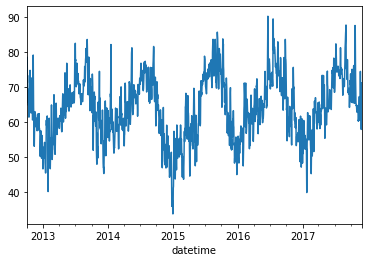

In [17]:
# Create and visualize the rolling data for Atlanta

day_temp['Los Angeles'].plot()
# Window set to 30 days
day_temp[['Los Angeles']].rolling(window=30).mean().plot

## 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.
### a.	Graph the predicted values 30 days out.


### Notes for myself about SARIMA

SARIMA is composed of two models: AR and MA. It's defined by 3 paramters:
- d = degree of first difference. 
    - Order of integration and calculated as the number of transformations needed to make plot stationary
- p = order of the AR. 
    - Determined by the ACF plot(autocorrelations which measure the relationship between an observation and its previous one)

- q = order of the moving average (MA). 
    - Determined by the PACF plot

## Checking SARIMA for my understanding

In [18]:
#Converting hourly data to daily data.

new_temps = new_temps.resample(rule='D').mean()
new_temps

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,52.647384,48.142756,61.279956,47.511072,65.653701,65.162291,68.376040,74.393131,54.187174,52.569190,...,55.207697,59.754956,54.928364,57.597963,92.248675,87.978169,98.457096,88.250000,88.2500,86.630000
2012-10-02,55.391342,55.377911,67.654951,53.612399,72.932811,71.854649,75.377093,82.511542,61.919277,55.541428,...,60.961271,63.936300,56.818276,60.553561,84.338192,85.347440,92.496327,87.350000,87.3500,85.145000
2012-10-03,54.280625,61.609625,74.802500,58.143125,78.545375,76.511750,81.575375,85.490750,64.499750,60.075500,...,62.966375,62.448125,57.604250,60.567500,82.479875,83.368250,86.251250,83.139875,83.0345,82.594625
2012-10-04,52.202000,55.998500,72.566750,52.235000,73.126250,73.275500,83.606000,84.349250,67.903250,65.198000,...,68.870750,65.906750,56.679500,62.408750,80.499500,80.222000,83.516375,78.780500,78.7805,78.393500
2012-10-05,51.093125,59.244875,63.473750,52.891250,67.637000,69.339875,81.461375,83.590250,67.422500,45.606875,...,69.558500,69.608375,57.893375,61.461125,79.811750,80.605625,80.078000,78.309500,78.3095,75.915500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,NaN,47.189000,NaN,48.968000,63.093500,58.042250,61.807250,67.515500,48.310250,48.773750,...,46.289000,NaN,32.462750,47.004500,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-27,NaN,44.190500,NaN,44.067500,61.186250,60.577250,64.832750,66.316250,46.716500,60.357500,...,41.631500,NaN,24.717500,38.619500,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-28,NaN,44.484500,NaN,44.499500,57.853025,54.698900,56.021150,62.841500,50.183000,44.035250,...,42.509750,NaN,19.416275,30.260750,NaN,NaN,NaN,NaN,NaN,NaN


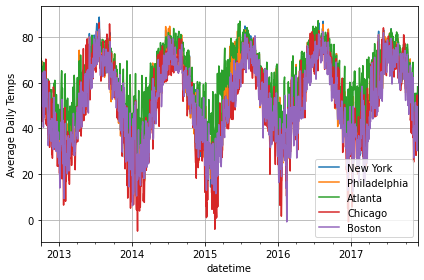

In [19]:
#plot the data to get a visual of five cities

new_temps[['New York', 'Philadelphia', 'Atlanta', 'Chicago', 'Boston']].plot()
plt.ylabel('Average Daily Temps')
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
new_temps = new_temps.dropna()

In [21]:
# computing ADF p-value on city New York
# Plot doesn't look stationary, but running adfuller test to check if plot is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_temps['New York'])
print("The p-value for the ADF test is ",result[1])
# 0th element = test statistic. When the test statistic > critical value, which implies that the series is not stationary. Same for if p-value is greater than 0.05

The p-value for the ADF test is  0.27032932111482216


<AxesSubplot:xlabel='datetime'>

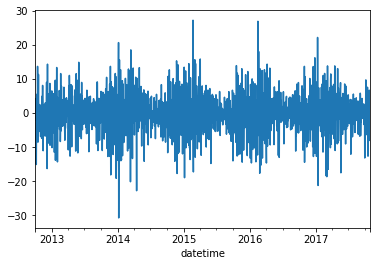

In [22]:
#to transform a stationary process. Take first difference to make it stationary. Also dropping NaNs
chg_temp = new_temps['New York'].diff().dropna()
chg_temp.plot()

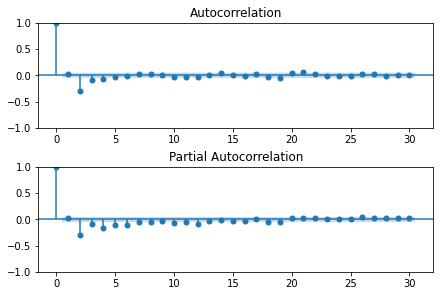

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot ACF and PACF on same page
fig, axes = plt.subplots(2, 1, constrained_layout=True)
#plot ACF
plot_acf(chg_temp, lags=30, ax=axes[0], missing='drop')

# Plot the PACF
plot_pacf(chg_temp, lags=30, ax=axes[1], method='ywm')
plt.show()

In [33]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
#fit the ARIMA model
model = ARIMA(new_temps['New York'], order=(3,1,1))
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               New York   No. Observations:                 1854
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -5726.556
Date:                Thu, 09 Dec 2021   AIC                          11463.112
Time:                        16:41:13   BIC                          11490.735
Sample:                    10-01-2012   HQIC                         11473.293
                         - 10-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7916      0.029     26.941      0.000       0.734       0.849
ar.L2         -0.3098      0.025    -12.588      0.000      -0.358      -0.262
ar.L3          0.0935      0.025      3.801      0.000       0.045       0.142
ma.L1         -0.8681      0.022    -39.290      0.000      -0.911      -0.825
sigma2        28.2940      0.740     38.239      0.000      26.844      29.744
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               134.66
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.07
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Building the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
p = 3
q = 1
d = 1
#fit the model to the data
model = SARIMAX(new_temps['New York'], order =(3,1,1), seosonal_order = (3,1,1,30), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11562D+00    |proj g|=  1.54831D-02

At iterate    5    f=  3.10625D+00    |proj g|=  1.61652D-01


 This problem is unconstrained.



At iterate   10    f=  3.08521D+00    |proj g|=  8.88748D-03

At iterate   15    f=  3.08460D+00    |proj g|=  8.78768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     27      1     0     0   5.068D-06   3.085D+00
  F =   3.0845992401995428     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               New York   No. Observations:                 1854
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -5718.847
Date:                Thu, 09 Dec 2021   AIC                          11447.694
Time:                        16:36:08   BIC                          11475.309
Sample:                    10-01-2012   HQIC                         11457.874
                         - 10-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7911      0.029     26.929      0.000       0.733       0.849
ar.L2         -0.3100      0.025    -12.580      0.000      -0.358      -0.262
ar.L3          0.0930      0.025      3.775      0.000       0.045       0.141
ma.L1         -0.8677      0.022    -39.186      0.000      -0.911      -0.824
sigma2        28.3298      0.741     38.233      0.000      26.878      29.782
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               134.76
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.07
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the AIC and BIC from the two models above, SARIMA is the better model.

In [29]:
#plot the forecasted return for the next 30 days
results_df = pd.DataFrame(results.forecast(steps=30))
results_df

,predicted_mean
2017-10-29,56.450744
2017-10-30,57.894449
2017-10-31,58.259812
2017-11-01,58.394758
2017-11-02,58.522455
2017-11-03,58.615605
2017-11-04,58.662254
2017-11-05,58.682152
2017-11-06,58.692091
2017-11-07,58.698122


## Running SARIMA on five cities

In [30]:
#P: Seasonal autoregressive order.
#D: Seasonal difference order.
#Q: Seasonal moving average order.
#m: The number of time steps for a single seasonal period. time step for single seasonal period 30 days
my_order = (3,1,1)
my_seasonal_order = (3,1,1,30)

In [ ]:
#emtpy to list to append SARIMA results
results = []
# City list to iterate through
cities = ['New York', 'Philadelphia', 'Atlanta', 'Chicago', 'Boston']

# Loop through the cities_list
for city in cities:
    #defining the model
    model = SARIMAX(new_temps[city], order = my_order, seasonal_order = my_seasonal_order, low_memory=True)
    #fit model
    res = model.fit()
    #append res to empty results list
    results.append(res)
    
results

## 8.	Explain what you see when you perform results.summary() on the cities in question 7. 

## Bonus: What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.


GARCH: Generalized Autoregressive Conditional Heteroskedasticity
heteroskedasticity - 

ARCH: Autoregressive Conditional Heteroskedasticity - 

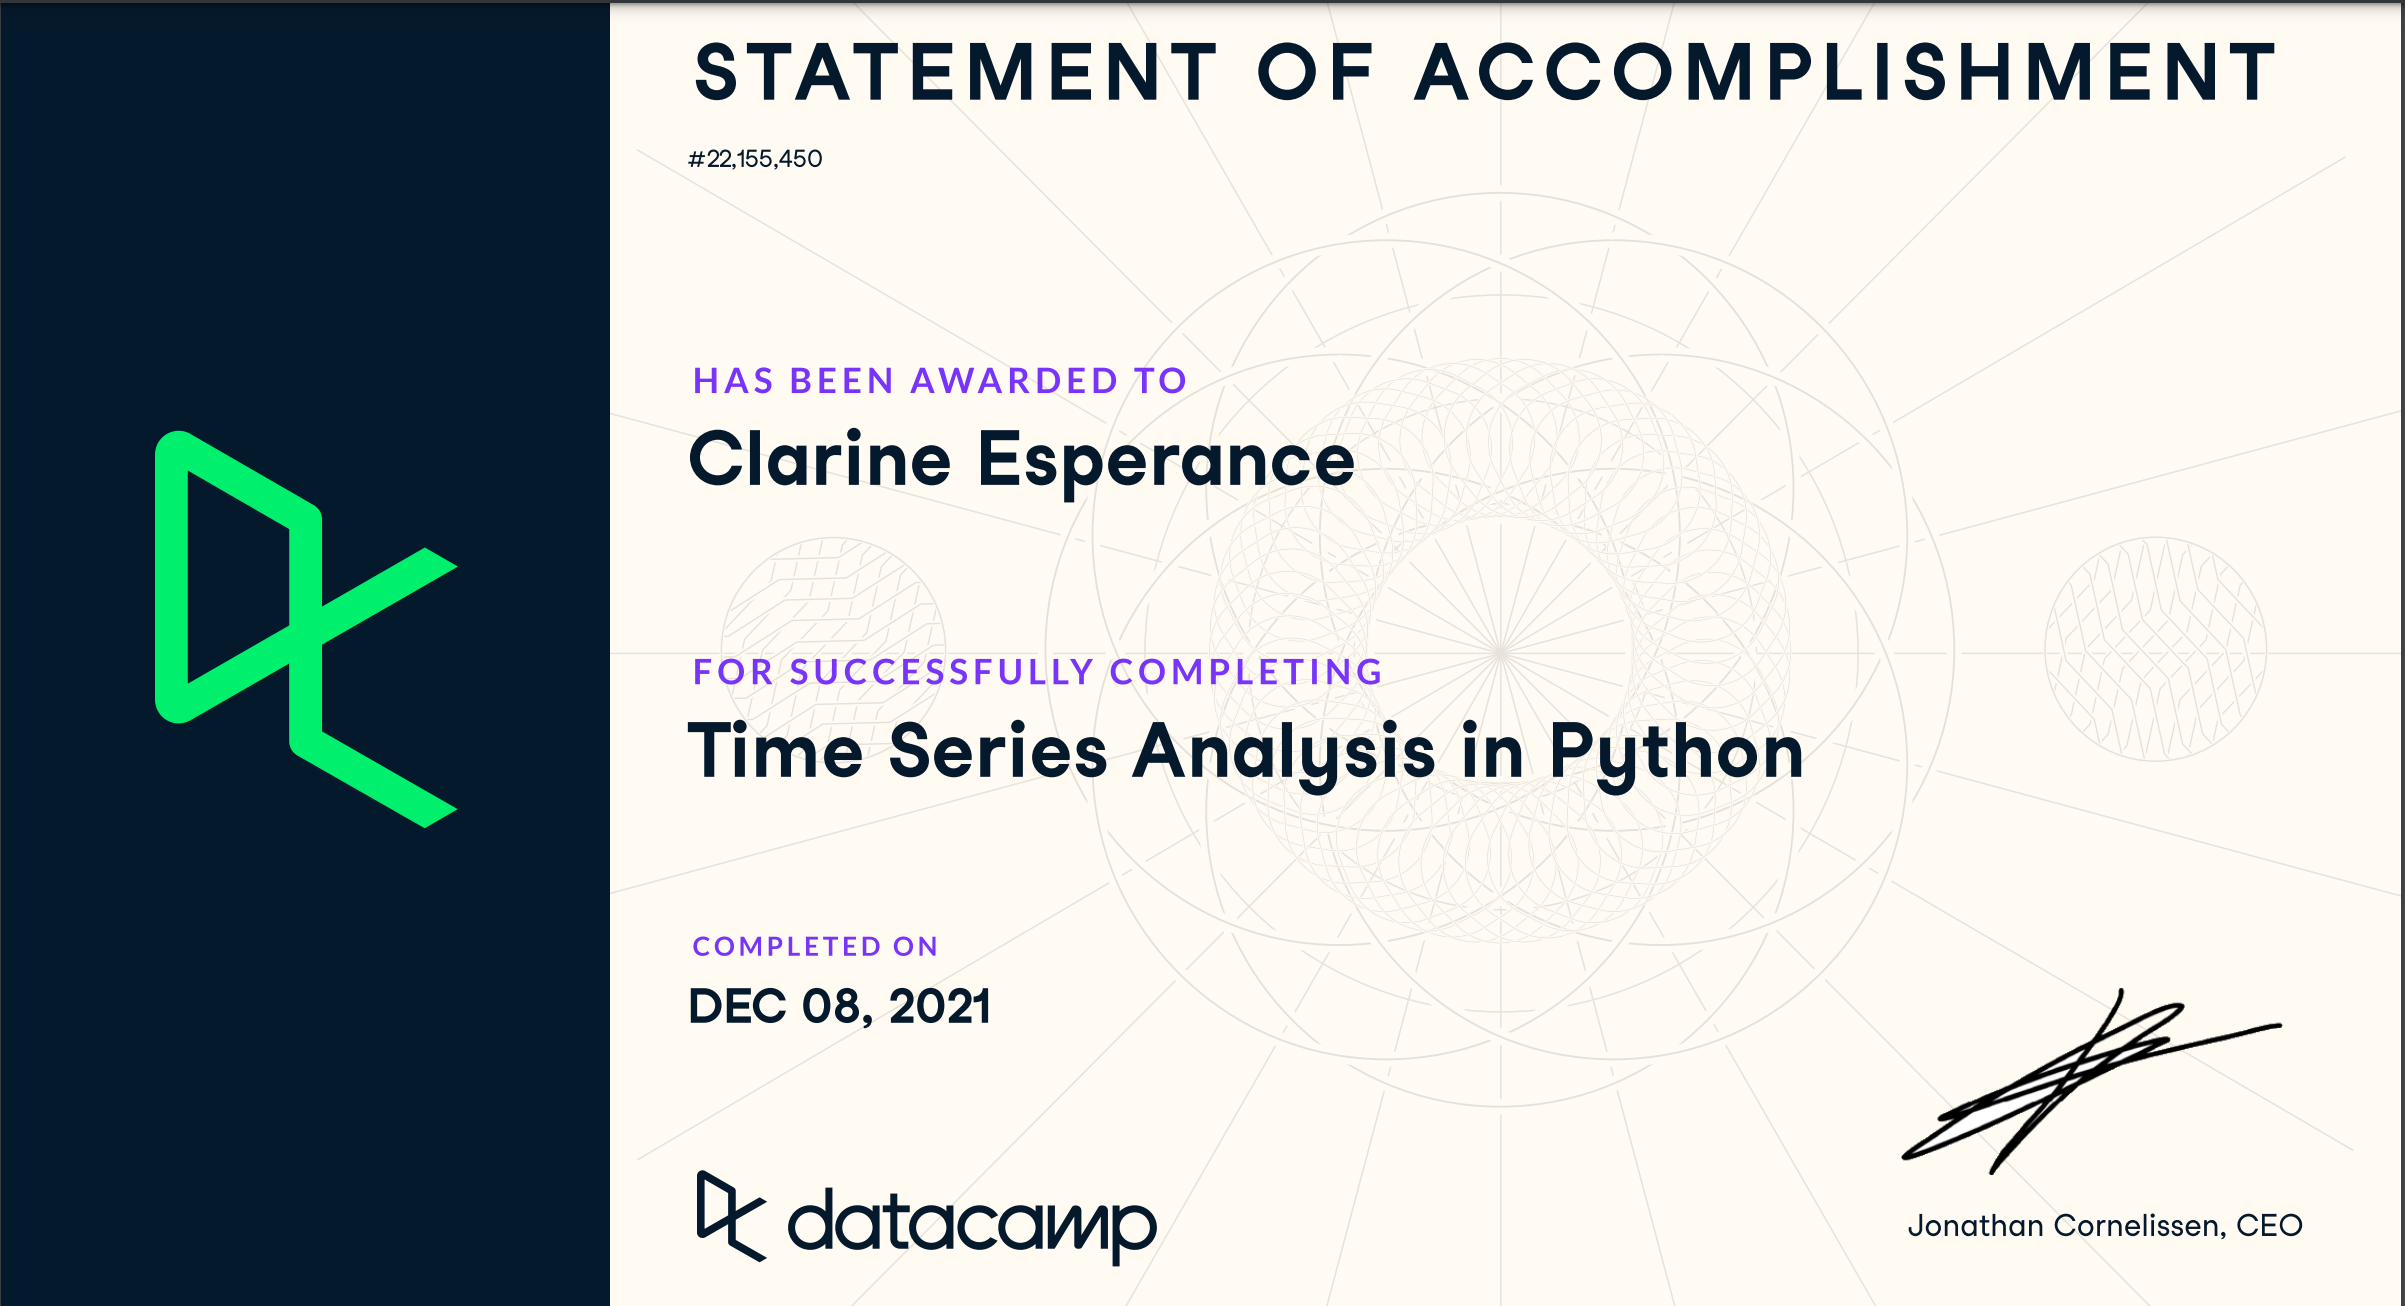